In [1]:
import matplotlib.pyplot as plt
import networkx as nx
from CCTPGraph import CCTPGraph
from src import cr_algorithm

def draw_cr_graph(G, pos=None, title="CR Graph"):
    """
    Draws the graph with solid black edges for 'normal' and dashed red for 'blocked' edges.
    """
    if pos is None:
        pos = nx.spring_layout(G)

    normal_edges = [(u, v) for u, v, d in G.edges(data=True)
                    if d.get('type') == 'normal' or 'type' not in d]
    blocked_edges = [(u, v) for u, v, d in G.edges(data=True)
                     if d.get('type') == 'blocked']

    plt.figure(figsize=(10, 10))
    nx.draw_networkx_nodes(G, pos, node_size=600, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=10)

    # Normal tour edges
    nx.draw_networkx_edges(G, pos, edgelist=normal_edges, width=2,
                           edge_color='black', style='solid', arrows=True)

    # Blocked edges
    nx.draw_networkx_edges(G, pos, edgelist=blocked_edges, width=2,
                           edge_color='red', style='dashed', arrows=True)

    # Optional: show weights if available
    edge_labels = nx.get_edge_attributes(G, 'weight')
    if edge_labels:
        nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)

    plt.title(title)
    plt.axis('off')
    plt.tight_layout()
    plt.show()


In [2]:

# ----------------------------------------------------------------------
# PART 1  : instance definition
# ----------------------------------------------------------------------

# Nodes v1 … v16 in order
nodes = [f"v{i}" for i in range(1, 17)]

# Fixed tour P (v1 → v2 → … → v16) – we do NOT compute Christofides here
tour = nodes.copy()

# Complete graph (all edge weights = 1; weights unused by CR but handy to have)
G = nx.complete_graph(nodes)
nx.set_edge_attributes(G, 1, "weight")

# Raw blocked edges from the paper
raw_blocked = [
    ("v3", "v4"), ("v3", "v5"), ("v7", "v8"), ("v9", "v10"),
    ("v12", "v13"), ("v12", "v14"),
    ("v16", "v4"), ("v4", "v5"), ("v8", "v10"), ("v13", "v14"),
    ("v13", "v10"), ("v10", "v5"), ("v5", "v14"), ("v14", "v1")
]

# Store blocked edges as sorted tuples so (u,v) ≡ (v,u)
blocked_edges = {tuple(sorted(e)) for e in raw_blocked}



# Make graph

final_route = cr_algorithm(G, "v1",
                            tour,
                            blocked_edges)

print("\nFinal tour:")
for u, v in final_route:
    print(f"{u} -> {v}")



[Round 1] dir=CW
  Blocked v3 → v4
    Skip v4
  Blocked v3 → v5
    Skip v5
  Blocked v7 → v8
    Skip v8
  Blocked v9 → v10
    Skip v10
  Blocked v12 → v13
    Skip v13
  Blocked v12 → v14
    Skip v14

[Round 2] dir=CW
  Blocked v16 → v4
    Detour v16 → v1 → v4
  Blocked v4 → v5
    Skip v5
  Blocked v8 → v10
    Skip v10
  Blocked v13 → v14
    Skip v14
  Flip direction (ended at v13, expected v14)

[Round 3] dir=CCW
  Blocked v13 → v10
    Detour v13 → v11 → v10
  Blocked v10 → v5
    Detour v10 → v7 → v5
  Blocked v5 → v14
    Detour v5 → v2 → v14

Final tour:
v1 -> v2
v2 -> v3
v3 -> v6
v6 -> v7
v7 -> v9
v9 -> v11
v11 -> v12
v12 -> v15
v15 -> v16
v16 -> v1
v1 -> v4
v4 -> v8
v8 -> v13
v13 -> v11
v11 -> v10
v10 -> v7
v7 -> v5
v5 -> v2
v2 -> v14
v14 -> v15
v15 -> v1


In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from typing import List, Set, Dict, Tuple
from rp_test import CCTPSolver


In [2]:
def create_example_graph():
    n = 16
    vertices = list(range(1, n + 1))
    graph = {i: {j: abs(i - j) for j in vertices if j != i} for i in vertices}
    return graph

def run_example():
    graph = create_example_graph()
    solver = CCTPSolver(graph)
    
    blocked_edges = [
        (3, 4), (3, 5), (7, 8), (9, 10),
        (12, 13), (12, 14), (16, 4),
        (4, 5), (8, 10), (13, 14), (14, 1)
    ]
    
    source = 1
    path = solver.cr_algorithm(source, blocked_edges)
    cost = solver.calculate_path_cost(path)
    
    print(f"Chemin parcouru: {path}")
    print(f"Coût total: {cost}")
    
    solver.visualize_graph(path)
    
    return path, cost


Chemin parcouru: [1, 2, 4, 4, 5, 6, 8, 8, 9, 10, 11, 13, 13, 14, 15, 16, 1, 3, 7, 12, 1]
Coût total: 52


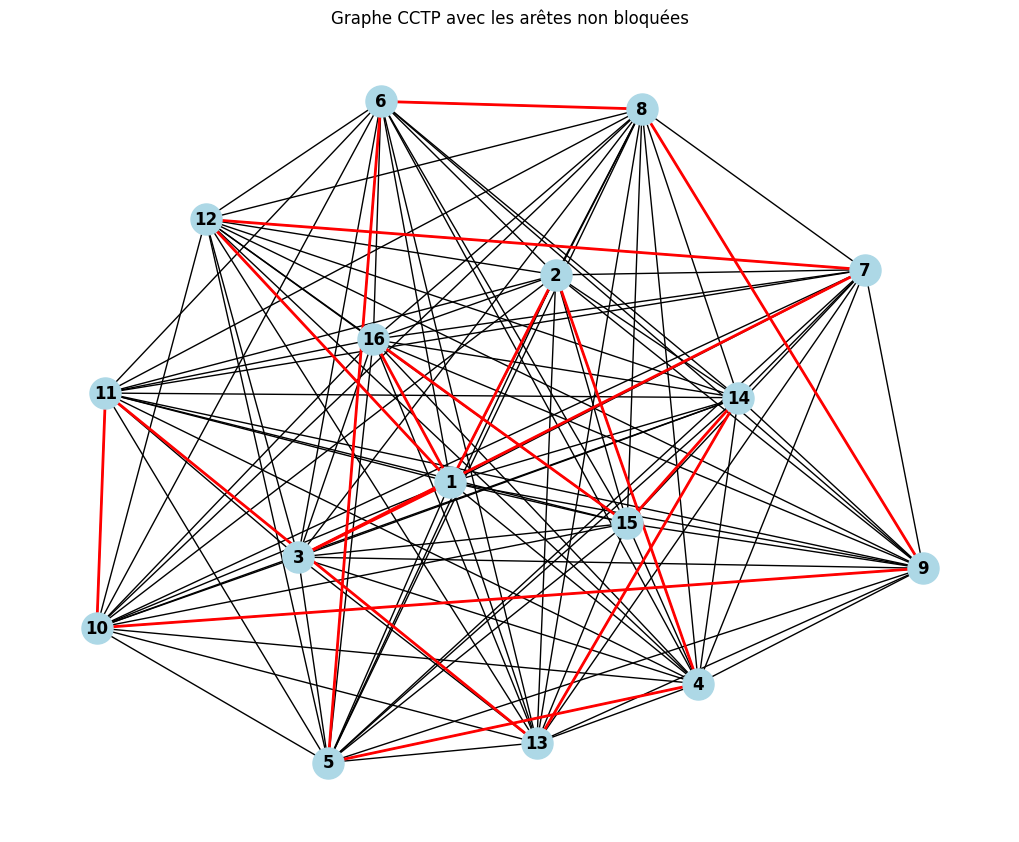

In [3]:
custom_graph = create_example_graph()
solver = CCTPSolver(custom_graph)

# Try different blocked edges
blocked_edges = [(2, 3), (6, 7), (11, 12)]
source = 1

path = solver.cr_algorithm(source, blocked_edges)
cost = solver.calculate_path_cost(path)

print(f"Chemin parcouru: {path}")
print(f"Coût total: {cost}")
solver.visualize_graph(path)
